# CS 577 Final Project: A comparison of classification methods for credit card fraud detection

In [ ]:
!pip install imbalanced-learn

In [1]:
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import time

## Loading and Preparing the Data

In [7]:
# Load data
df = pd.read_csv('creditcarddata.csv')

# Scale features left out of original pca
df['Vamount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['Vtime'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))
df = df.drop(['Time','Amount'], axis = 1)

# Drop na values
df = df.dropna()

# Set up features and dv
x = df.drop(['Class'], axis = 1)
y = df['Class']

smote = SMOTE(random_state=42)

## Data Exploration

In [19]:
nrows = df.shape[0]
print(f"Number of rows: {nrows}")

Number of rows: 284807


In [ ]:
# Extract counts for each class
class_counts = df['Class'].value_counts()
print(class_counts)

# Proportions
class_proportions = df['Class'].value_counts(normalize=True)
print(class_proportions)

Class
0    284315
1       492
Name: count, dtype: int64
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


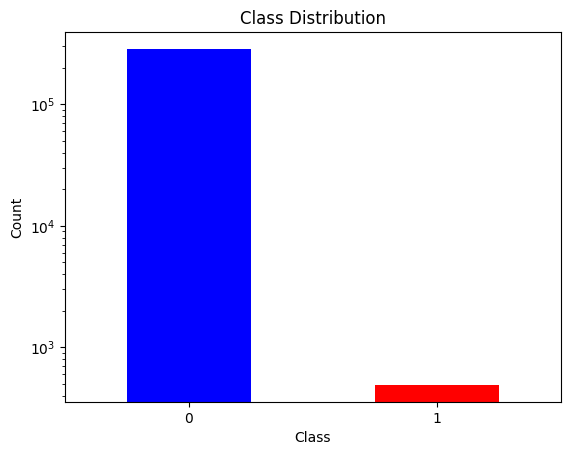

In [ ]:
# Plot the class distribution
class_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.yscale('log')
plt.xticks(rotation=0)
plt.show()

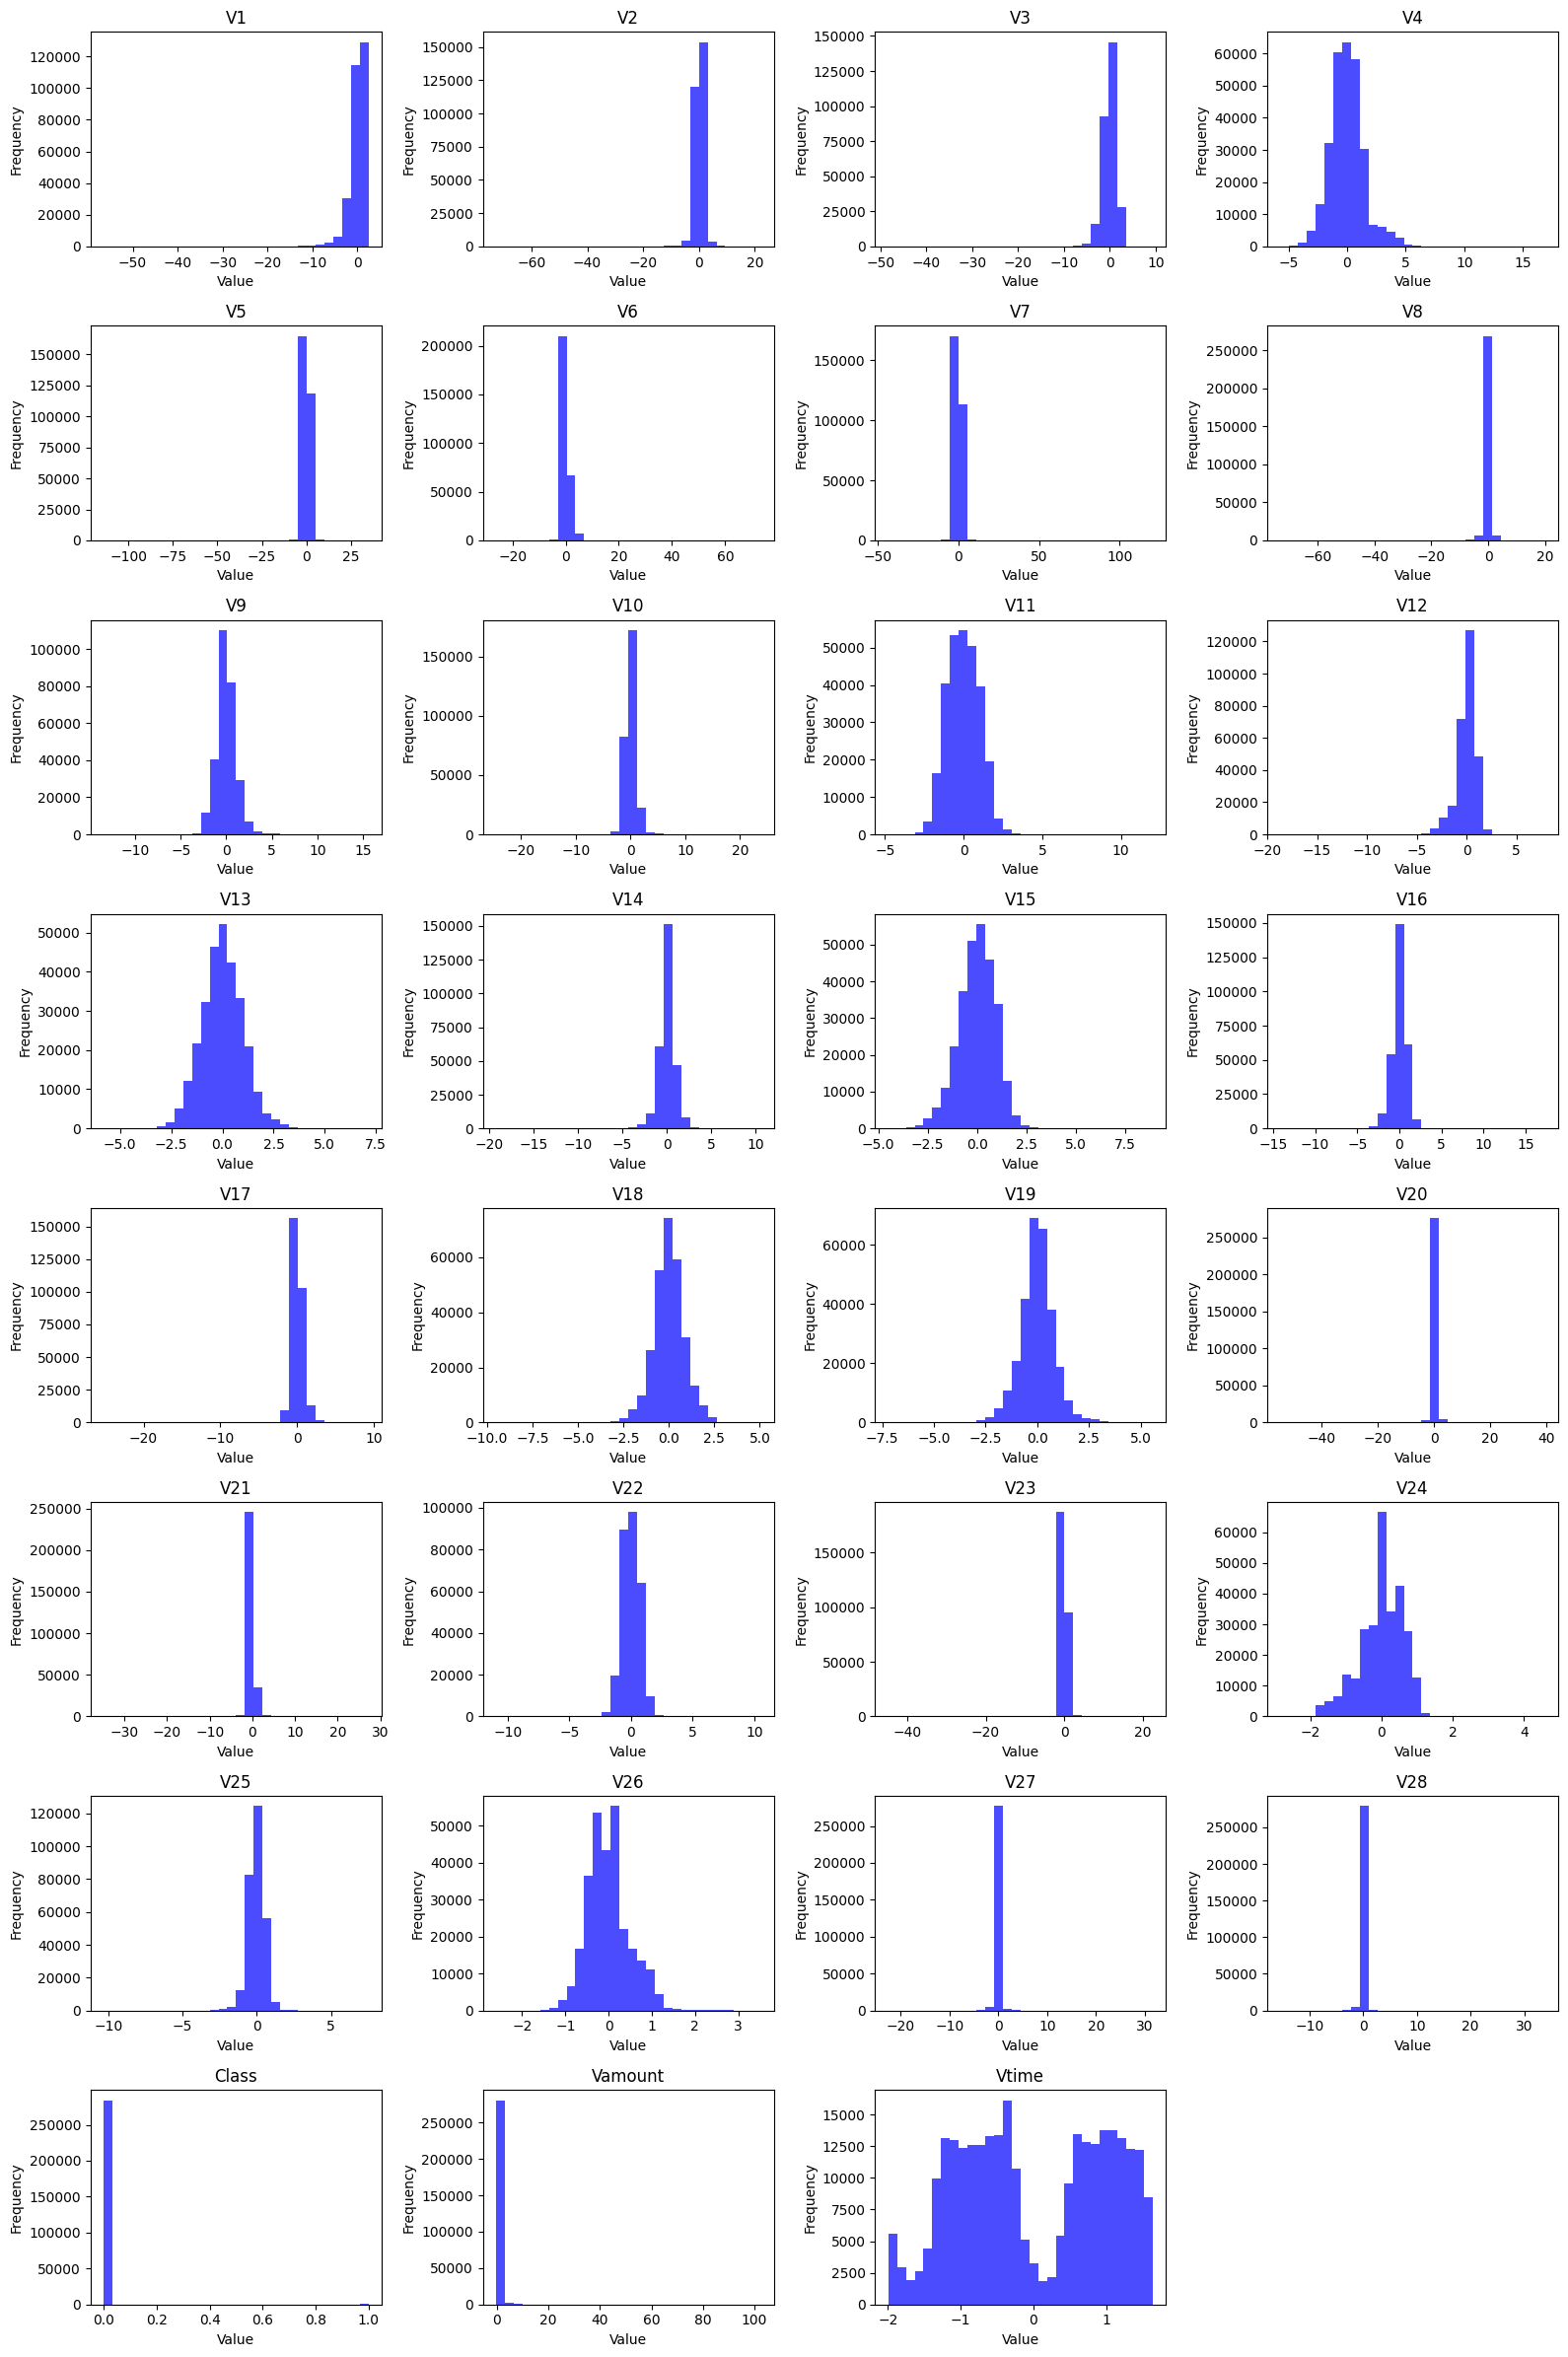

In [ ]:
# Plot feature distributions as histograms
numerical_features = df.select_dtypes(include=['float64', 'int64'])
num_features = numerical_features.shape[1]
n_cols = 4
n_rows = (num_features + n_cols - 1) // n_cols # Number of rows in grid

# Subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 3))
axes = axes.flatten()

# Plot
for i, col in enumerate(numerical_features.columns):
    axes[i].hist(numerical_features[col], bins=30, color='blue', alpha=0.7)
    axes[i].set_title(col)
    axes[i].set_ylabel("Frequency")
    axes[i].set_xlabel("Value")

# Delete empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

### Data Preparation

In [22]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smote)
x_test_scaled = scaler.transform(x_test)

### Implementation

In [24]:
# Fit knn
knn = KNeighborsClassifier(n_neighbors = 15)

start_time = time.time()

knn.fit(x_train_scaled, y_train_smote)

end_time = time.time()

# Predictions
y_pred = knn.predict(x_test_scaled)

# Evaluate the model using classification_report
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Training Time: {end_time - start_time:.2f} seconds")

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.18      0.86      0.30        98

    accuracy                           0.99     56962
   macro avg       0.59      0.93      0.65     56962
weighted avg       1.00      0.99      1.00     56962

Training Time: 0.21 seconds


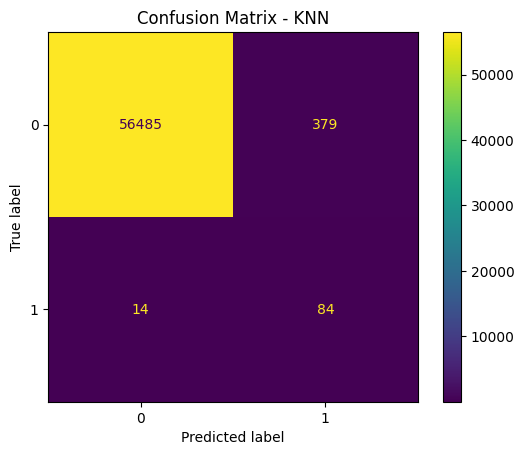

In [25]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.title("Confusion Matrix - KNN")
plt.show()

## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

### Data Preparation

In [27]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.2, random_state=42)

x_train_smote1, y_train_smote1 = smote.fit_resample(x_train1, y_train1)

# Scale the data
scaler = StandardScaler()
x_train_scaled1 = scaler.fit_transform(x_train_smote1)
x_test_scaled1 = scaler.transform(x_test1)

### Implementation

In [28]:
# Fit log reg model
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

start_time = time.time()

log_reg.fit(x_train1, y_train1)

end_time = time.time()

# Predictions
y_pred_proba1 = log_reg.predict_proba(x_test1)[:, 1]

# Threshold adjustment
threshold = 0.9983
y_pred_adjusted1 = (y_pred_proba1 >= threshold).astype(int)

# Evaluation
print("Classification Report :\n", classification_report(y_test1, y_pred_adjusted1))
print(f"Training Time: {end_time - start_time:.2f} seconds")

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.84      0.78        98

    accuracy                           1.00     56962
   macro avg       0.86      0.92      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Training Time: 2.45 seconds


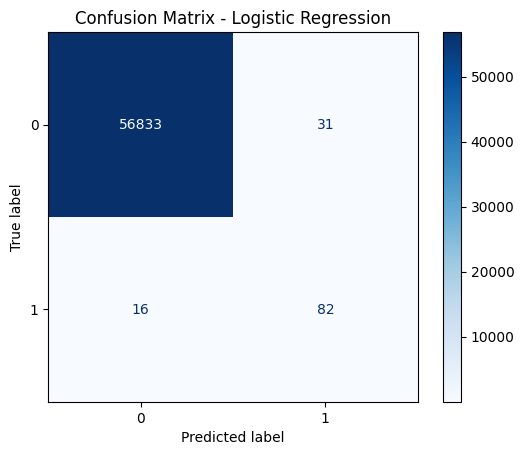

In [39]:
# Confusion Matrix
cm1 = confusion_matrix(y_test1, y_pred_adjusted1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=[0,1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

## Linear Discriminant Analysis

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### Data Preparation

In [31]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.2, random_state=42)

x_train_smote2, y_train_smote2 = smote.fit_resample(x_train2, y_train2)

# Scale the data
scaler = StandardScaler()
x_train_scaled2 = scaler.fit_transform(x_train_smote2)
x_test_scaled2 = scaler.transform(x_test2)

### Implementation

In [32]:
lda = LinearDiscriminantAnalysis(priors=[0.7, 0.3])

start_time = time.time()
lda.fit(x_train_scaled1, y_train_smote2)
end_time = time.time()

y_pred2 = lda.predict(x_test_scaled2)

print("Classification Report:\n", classification_report(y_test2, y_pred2))
print(f"Training Time: {end_time - start_time:.2f} seconds")

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.16      0.80      0.26        98

    accuracy                           0.99     56962
   macro avg       0.58      0.89      0.63     56962
weighted avg       1.00      0.99      0.99     56962

Training Time: 1.89 seconds


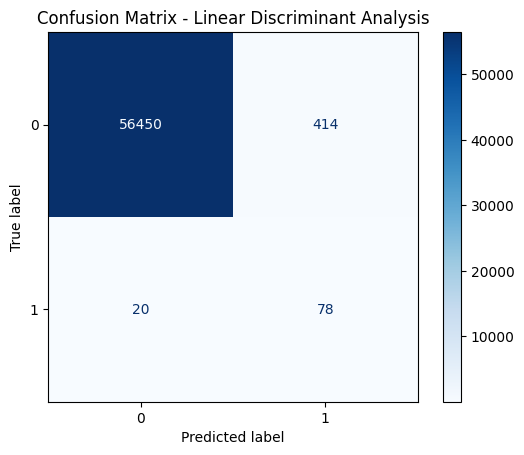

In [33]:
# Confusion Matrix
cm2 = confusion_matrix(y_test2, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=[0,1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Linear Discriminant Analysis")
plt.show()

## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

### Data Preparation

In [35]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(x, y, test_size=0.2, random_state=42)

x_train_smote4, y_train_smote4 = smote.fit_resample(x_train4, y_train4)

# Scale the data
scaler = StandardScaler()
x_train_scaled4 = scaler.fit_transform(x_train_smote4)
x_test_scaled4 = scaler.transform(x_test4)

### Implementation

In [36]:
# Random forest
rf = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=42
)

# Fit model
start_time = time.time()

rf.fit(x_train_scaled4, y_train_smote4)

end_time = time.time()

# Make predictions
y_pred4 = rf.predict(x_test_scaled4)
y_pred_proba4 = rf.predict_proba(x_test_scaled4)[:, 1]

# Evaluate the model
print("Classification Report:\n", classification_report(y_test4, y_pred4))
print(f"Training Time: {end_time - start_time:.2f} seconds")

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.86      0.88        98

    accuracy                           1.00     56962
   macro avg       0.95      0.93      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Training Time: 1162.00 seconds


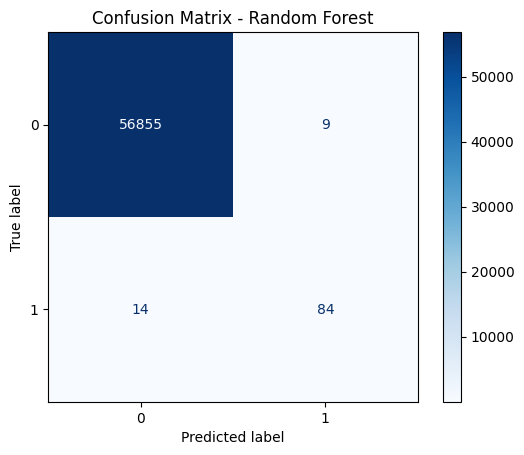

In [40]:
# Confusion Matrix
cm4 = confusion_matrix(y_test4, y_pred4)
disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=[0,1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()